In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("data.xlsx")

In [3]:
bulan_mapping = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

# Ganti nama bulan Indonesia ke Inggris
for indo, eng in bulan_mapping.items():
    data['Tahun'] = data['Tahun'].str.replace(indo, eng)

# Konversi ke datetime
data['Tahun'] = pd.to_datetime(data['Tahun'], format='%Y %B')

In [4]:
data.head()

,Tahun,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,...,Ekspor_NON_MIGAS,Ekspor_Agriculture,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
0,2025-04-01,"16,787.00","11,789.46","22,532.36","20,387.45","12,847.38","3,884.54","2,163.65","10,794.05","12,147.77",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"58,21"
1,2025-03-01,"16,588.00","11,029.63","21,416.78","18,771.10","12,406.43","3,745.33","2,133.52","10,481.14","11,640.30",...,"21,794.34",575.05,"18,153.10","3,024.96",41.23,"18,919.98","1,741.66","13,477.24","3,701.07","71,48"
2,2025-02-01,"16,431.00","11,007.58","20,813.16","18,330.00","12,256.92","3,700.68","2,113.35","10,347.43","11,459.36",...,"20,816.24",564.32,"17,630.28","2,579.98",41.67,"18,849.00","1,466.93","13,932.19","3,449.88","69,76"
3,2025-01-01,"16,259.00","10,523.63","20,245.72","17,938.99","12,045.96","3,701.14","2,086.94","10,117.19","11,276.50",...,"20,371.43",547.31,"17,105.37","2,687.13",31.62,"17,935.92","1,644.42","12,974.15","3,317.34","72,53"
4,2024-12-01,"16,162.00","10,236.25","20,332.61","17,920.95","11,919.34","3,616.48","2,082.02","10,081.88","11,225.18",...,"21,921.95",582.06,"17,610.97","3,696.88",32.04,"21,221.23","2,304.76","15,004.75","3,911.73","71,72"


In [5]:
data.isnull().sum()

Tahun                          0
USD                            0
JPY                            0
GBP                            0
CHF                            0
SGD                            0
MYR                            0
HKD                            0
AUD                            0
CAD                            0
Data Inflansi                  0
BI Rate                        2
Total Ekspor                   1
Ekspor_MIGAS                   1
Ekspor_NON_MIGAS               1
Ekspor_Agriculture             1
Ekspor_Industry                1
Ekspor_Mining                  1
Ekspor_Lain                    1
Total_Import                   1
Import_Consumption_Goods       1
Import_Raw_Material_Support    1
Import_Capital_Goods           1
Minyak WTI                     1
dtype: int64

In [6]:
data.dtypes

Tahun                          datetime64[ns]
USD                                    object
JPY                                    object
GBP                                    object
CHF                                    object
SGD                                    object
MYR                                    object
HKD                                    object
AUD                                    object
CAD                                    object
Data Inflansi                          object
BI Rate                                object
Total Ekspor                           object
Ekspor_MIGAS                           object
Ekspor_NON_MIGAS                       object
Ekspor_Agriculture                    float64
Ekspor_Industry                        object
Ekspor_Mining                          object
Ekspor_Lain                           float64
Total_Import                           object
Import_Consumption_Goods               object
Import_Raw_Material_Support       

In [7]:
percent_cols = ['Data Inflansi', 'BI Rate']

for col in percent_cols:
    data[col] = data[col].str.replace('%', '', regex=False).astype(float) / 100


In [8]:
for col in data.columns:
    if col not in percent_cols and data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '', regex=False)  # If numbers have commas
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to float safely



In [9]:
data.dtypes

Tahun                          datetime64[ns]
USD                                   float64
JPY                                   float64
GBP                                   float64
CHF                                   float64
SGD                                   float64
MYR                                   float64
HKD                                   float64
AUD                                   float64
CAD                                   float64
Data Inflansi                         float64
BI Rate                               float64
Total Ekspor                          float64
Ekspor_MIGAS                          float64
Ekspor_NON_MIGAS                      float64
Ekspor_Agriculture                    float64
Ekspor_Industry                       float64
Ekspor_Mining                         float64
Ekspor_Lain                           float64
Total_Import                          float64
Import_Consumption_Goods              float64
Import_Raw_Material_Support       

In [10]:
data.head()

,Tahun,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,...,Ekspor_NON_MIGAS,Ekspor_Agriculture,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
0,2025-04-01,16787.0,11789.46,22532.36,20387.45,12847.38,3884.54,2163.65,10794.05,12147.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5821.0
1,2025-03-01,16588.0,11029.63,21416.78,18771.10,12406.43,3745.33,2133.52,10481.14,11640.30,...,21794.34,575.05,18153.10,3024.96,41.23,18919.98,1741.66,13477.24,3701.07,7148.0
2,2025-02-01,16431.0,11007.58,20813.16,18330.00,12256.92,3700.68,2113.35,10347.43,11459.36,...,20816.24,564.32,17630.28,2579.98,41.67,18849.00,1466.93,13932.19,3449.88,6976.0
3,2025-01-01,16259.0,10523.63,20245.72,17938.99,12045.96,3701.14,2086.94,10117.19,11276.50,...,20371.43,547.31,17105.37,2687.13,31.62,17935.92,1644.42,12974.15,3317.34,7253.0
4,2024-12-01,16162.0,10236.25,20332.61,17920.95,11919.34,3616.48,2082.02,10081.88,11225.18,...,21921.95,582.06,17610.97,3696.88,32.04,21221.23,2304.76,15004.75,3911.73,7172.0


In [11]:
# Forward fill untuk kolom tertentu
data['BI Rate'] = data['BI Rate'].fillna(method='ffill')
data['Minyak WTI'] = data['Minyak WTI'].fillna(method='ffill')

# Backward fill untuk banyak kolom
bfill_cols = [
    'Total Ekspor', 'Ekspor_MIGAS', 'Ekspor_NON_MIGAS',
    'Ekspor_Agriculture', 'Ekspor_Industry', 'Ekspor_Mining', 'Ekspor_Lain',
    'Total_Import', 'Import_Consumption_Goods',
    'Import_Raw_Material_Support', 'Import_Capital_Goods'
]
data[bfill_cols] = data[bfill_cols].fillna(method='bfill')


/tmp/ipykernel_9095/546988704.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['BI Rate'] = data['BI Rate'].fillna(method='ffill')
/tmp/ipykernel_9095/546988704.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Minyak WTI'] = data['Minyak WTI'].fillna(method='ffill')
/tmp/ipykernel_9095/546988704.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[bfill_cols] = data[bfill_cols].fillna(method='bfill')


In [12]:
print(data.isnull().sum())

Tahun                          0
USD                            0
JPY                            0
GBP                            0
CHF                            0
SGD                            0
MYR                            0
HKD                            0
AUD                            0
CAD                            0
Data Inflansi                  0
BI Rate                        0
Total Ekspor                   0
Ekspor_MIGAS                   0
Ekspor_NON_MIGAS               0
Ekspor_Agriculture             0
Ekspor_Industry                0
Ekspor_Mining                  0
Ekspor_Lain                    0
Total_Import                   0
Import_Consumption_Goods       0
Import_Raw_Material_Support    0
Import_Capital_Goods           0
Minyak WTI                     0
dtype: int64


In [13]:
data.fillna(method='ffill').fillna(method='bfill')

/tmp/ipykernel_9095/3883722823.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill').fillna(method='bfill')


,Tahun,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,...,Ekspor_NON_MIGAS,Ekspor_Agriculture,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
0,2025-04-01,16787.0,11789.46,22532.36,20387.45,12847.38,3884.54,2163.65,10794.05,12147.77,...,21794.34,575.05,18153.10,3024.96,41.23,18919.98,1741.66,13477.24,3701.07,5821.0
1,2025-03-01,16588.0,11029.63,21416.78,18771.10,12406.43,3745.33,2133.52,10481.14,11640.30,...,21794.34,575.05,18153.10,3024.96,41.23,18919.98,1741.66,13477.24,3701.07,7148.0
2,2025-02-01,16431.0,11007.58,20813.16,18330.00,12256.92,3700.68,2113.35,10347.43,11459.36,...,20816.24,564.32,17630.28,2579.98,41.67,18849.00,1466.93,13932.19,3449.88,6976.0
3,2025-01-01,16259.0,10523.63,20245.72,17938.99,12045.96,3701.14,2086.94,10117.19,11276.50,...,20371.43,547.31,17105.37,2687.13,31.62,17935.92,1644.42,12974.15,3317.34,7253.0
4,2024-12-01,16162.0,10236.25,20332.61,17920.95,11919.34,3616.48,2082.02,10081.88,11225.18,...,21921.95,582.06,17610.97,3696.88,32.04,21221.23,2304.76,15004.75,3911.73,7172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2016-05-01,13615.0,12256.39,19998.40,13726.91,9873.82,3310.65,1752.57,9852.51,10448.97,...,10559.45,220.47,9071.60,1230.05,37.33,11140.68,1001.52,8504.45,1638.22,4910.0
108,2016-04-01,13204.0,12301.68,19335.96,13693.58,9832.09,3394.79,1702.07,10090.50,10533.30,...,10798.01,213.08,9373.81,1172.25,38.86,10813.62,1001.52,8173.29,1764.93,4592.0
109,2016-03-01,13276.0,11818.24,19057.71,13746.86,9830.09,3389.34,1712.12,10162.13,10221.75,...,10572.81,224.51,8944.60,1369.86,33.84,11301.71,1001.52,8620.92,1690.68,3834.0
110,2016-02-01,13395.0,11814.79,18562.80,13446.12,9492.61,3164.06,1722.69,9540.61,9899.14,...,10203.45,214.70,8683.94,1279.55,25.26,10175.63,1001.52,7384.10,1790.02,3375.0


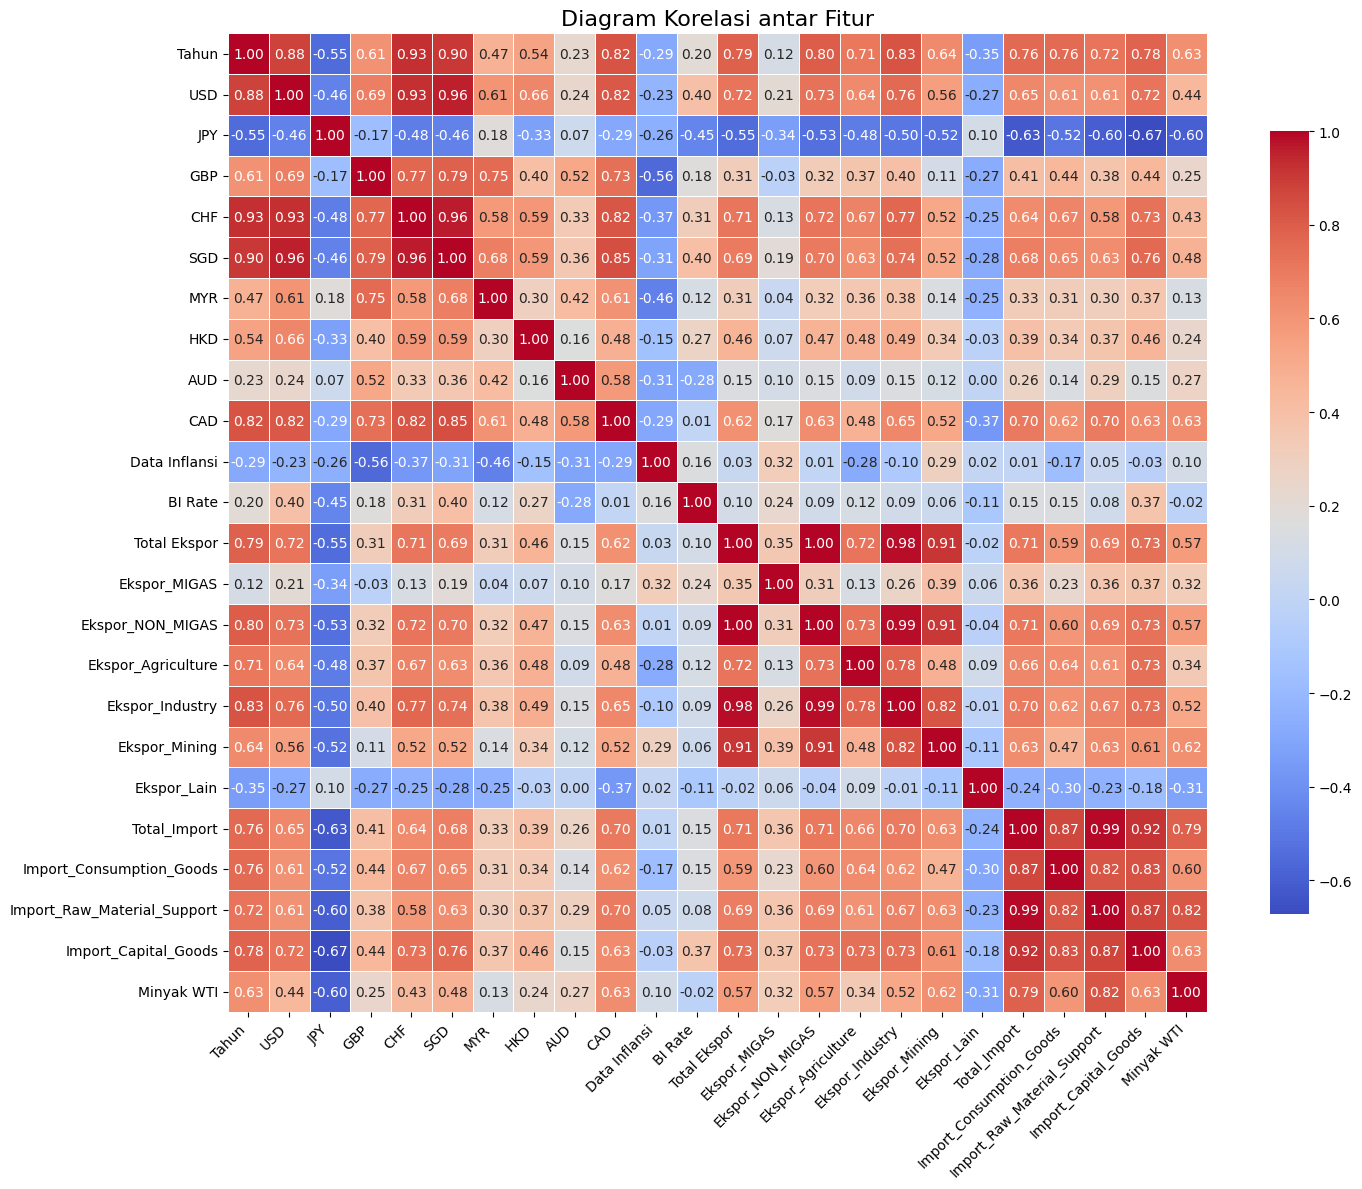

In [14]:
import seaborn as sns
correlation_matrix = data.corr()

# Set ukuran figure
plt.figure(figsize=(15, 12))

# Buat heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

# Tambahkan judul
plt.title("Diagram Korelasi antar Fitur", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# Plot semua kolom
plt.figure(figsize=(18, 10))
plt.plot(data_line.index, data_line["USD"], label="USD")

plt.title('Line Chart Seluruh Fitur')
plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


NameError: name 'data_line' is not defined

<Figure size 1800x1000 with 0 Axes>

In [ ]:
missing = data.isnull().sum()
missing[missing > 0]

In [16]:
print(data.columns)


Index(['Tahun', 'USD', 'JPY', 'GBP', 'CHF', 'SGD', 'MYR', 'HKD', 'AUD', 'CAD',
       'Data Inflansi', 'BI Rate', 'Total Ekspor', 'Ekspor_MIGAS',
       'Ekspor_NON_MIGAS', 'Ekspor_Agriculture', 'Ekspor_Industry',
       'Ekspor_Mining', 'Ekspor_Lain', 'Total_Import',
       'Import_Consumption_Goods', 'Import_Raw_Material_Support',
       'Import_Capital_Goods', 'Minyak WTI'],
      dtype='object')


In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt


In [18]:
# Step 1: Pastikan index datetime
data['Tahun'] = pd.to_datetime(data['Tahun'], format='%Y %M %d')
data.set_index('Tahun', inplace=True)
data = data.asfreq('MS')  # Anggap data bulanan

In [19]:
data.head()

,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,Data Inflansi,...,Ekspor_NON_MIGAS,Ekspor_Agriculture,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
Tahun,,,,,,,,,,,,,,,,,,,,,
2016-01-01,13846.0,11675.04,19875.26,13645.45,9707.31,3329.58,1776.71,9826.51,9863.94,0.0414,...,9473.86,249.40,7890.50,1313.28,20.68,10467.00,1155.63,7505.17,1806.20,3375.0
2016-02-01,13395.0,11814.79,18562.80,13446.12,9492.61,3164.06,1722.69,9540.61,9899.14,0.0442,...,10203.45,214.70,8683.94,1279.55,25.26,10175.63,1001.52,7384.10,1790.02,3375.0
2016-03-01,13276.0,11818.24,19057.71,13746.86,9830.09,3389.34,1712.12,10162.13,10221.75,0.0445,...,10572.81,224.51,8944.60,1369.86,33.84,11301.71,1001.52,8620.92,1690.68,3834.0
2016-04-01,13204.0,12301.68,19335.96,13693.58,9832.09,3394.79,1702.07,10090.50,10533.30,0.0360,...,10798.01,213.08,9373.81,1172.25,38.86,10813.62,1001.52,8173.29,1764.93,4592.0
2016-05-01,13615.0,12256.39,19998.40,13726.91,9873.82,3310.65,1752.57,9852.51,10448.97,0.0333,...,10559.45,220.47,9071.60,1230.05,37.33,11140.68,1001.52,8504.45,1638.22,4910.0


In [20]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    # print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    # print(out.to_string())          # .to_string() removes the line "dtype: float64"
    return [result[1], result[1] <= 0.05]

In [21]:
data_test = data.copy()

In [22]:
for col in data.columns:
    print(f"{col}: {adf_test(data_test[col])}")

USD: [0.5935112784217265, False]
JPY: [0.4061252015564436, False]
GBP: [0.8553918396706535, False]
CHF: [0.9915490860066283, False]
SGD: [0.9827163655192511, False]
MYR: [0.39508925324937627, False]
HKD: [3.531553287962974e-10, True]
AUD: [0.014319183187568535, True]
CAD: [0.16032492556412425, False]
Data Inflansi: [0.08100036694294127, False]
BI Rate: [0.3551070320593237, False]
Total Ekspor: [0.432766477767083, False]
Ekspor_MIGAS: [0.0002995460177828785, True]
Ekspor_NON_MIGAS: [0.4250735468976108, False]
Ekspor_Agriculture: [0.32306607871253573, False]
Ekspor_Industry: [0.4808101085430225, False]
Ekspor_Mining: [0.2527501934470998, False]
Ekspor_Lain: [0.012597162113010395, True]
Total_Import: [0.5739202401181899, False]
Import_Consumption_Goods: [0.7154374254915974, False]
Import_Raw_Material_Support: [0.47665291889095956, False]
Import_Capital_Goods: [0.9343228109663106, False]
Minyak WTI: [0.18268988396909308, False]


In [23]:
for col in data_test.columns:
    if (not (adf_test(data_test[col])[1])):
        data_test[col] = data_test[col].diff().dropna()
    print(f"{col}: {adf_test(data_test[col])}")

USD: [2.3122542144462194e-12, True]
JPY: [1.3253439015970281e-20, True]
GBP: [1.0007541091887654e-11, True]
CHF: [3.6081937817131796e-11, True]
SGD: [1.4249235169160437e-11, True]
MYR: [2.598449434744491e-22, True]
HKD: [3.531553287962974e-10, True]
AUD: [0.014319183187568535, True]
CAD: [5.64381041896908e-12, True]
Data Inflansi: [0.0008313439779231121, True]
BI Rate: [1.7536470161817876e-06, True]
Total Ekspor: [0.0001177560176183656, True]
Ekspor_MIGAS: [0.0002995460177828785, True]
Ekspor_NON_MIGAS: [1.7450893632289304e-27, True]
Ekspor_Agriculture: [0.0675942899155046, False]
Ekspor_Industry: [1.268312848410297e-29, True]
Ekspor_Mining: [2.2728058336172884e-16, True]
Ekspor_Lain: [0.012597162113010395, True]
Total_Import: [0.03776795742890595, True]
Import_Consumption_Goods: [2.982103987161748e-06, True]
Import_Raw_Material_Support: [0.03808730038805368, True]
Import_Capital_Goods: [0.021470621491110113, True]
Minyak WTI: [1.810215820313352e-15, True]


In [24]:
for col in data_test.columns:
    if (not (adf_test(data_test[col])[1])):
        print(f"{col}: {adf_test(data_test[col])}")

Ekspor_Agriculture: [0.0675942899155046, False]


In [25]:
data_test.drop(columns=["Ekspor_Agriculture"],inplace=True)

In [26]:
data_test = data_test.dropna()

In [55]:
test_obs = 12
train = data_test
test = data_test

In [56]:
print(train.isna().sum())
print(np.isinf(train).sum())  # Harusnya semua nol
print(train.describe())  # Lihat apakah ada kolom dengan std = 0

USD                            0
JPY                            0
GBP                            0
CHF                            0
SGD                            0
MYR                            0
HKD                            0
AUD                            0
CAD                            0
Data Inflansi                  0
BI Rate                        0
Total Ekspor                   0
Ekspor_MIGAS                   0
Ekspor_NON_MIGAS               0
Ekspor_Industry                0
Ekspor_Mining                  0
Ekspor_Lain                    0
Total_Import                   0
Import_Consumption_Goods       0
Import_Raw_Material_Support    0
Import_Capital_Goods           0
Minyak WTI                     0
dtype: int64
USD                            0
JPY                            0
GBP                            0
CHF                            0
SGD                            0
MYR                            0
HKD                            0
AUD                           

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = pd.DataFrame(
    scaler.fit_transform(train),
    columns=train.columns,  # Keep original column names
    index=train.index       # Keep original index (dates)
)

train.head()

,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,Data Inflansi,...,Ekspor_MIGAS,Ekspor_NON_MIGAS,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
Tahun,,,,,,,,,,,,,,,,,,,,,
2016-02-01,-1.340930,0.375404,-2.336644,-0.596270,-1.131485,-2.113930,-0.940223,-1.829533,0.059272,0.803826,...,-0.839104,0.327045,0.446757,-0.101051,-1.074400,-0.165445,-0.589164,-0.109173,-0.075761,-0.034969
2016-03-01,-0.408589,0.006547,0.823478,0.550260,1.439758,2.730812,-1.005366,-0.292407,1.224086,0.133367,...,-0.098376,0.136595,0.107201,0.153969,-0.179962,0.472637,-0.019515,0.738557,-0.265238,0.693417
2016-04-01,-0.276601,1.305503,0.444656,-0.261415,-0.122415,0.005583,-1.067305,-0.469561,1.179262,-2.226649,...,-0.098376,0.060379,0.214623,-0.437980,0.343357,-0.254001,-0.019515,-0.313044,0.130281,1.167899
2016-05-01,1.079787,-0.125354,1.116398,-0.062841,0.062589,-1.105063,-0.756072,-1.058151,-0.425159,-0.671184,...,-0.098376,-0.184807,-0.251532,0.087130,0.183860,0.112949,-0.019515,0.173154,-0.327600,0.469664
2016-06-01,-1.295998,1.552283,-4.091472,-0.763777,-0.612515,-0.464139,-1.087643,-1.147284,-1.148055,0.374732,...,-0.403672,0.712836,0.637694,0.615756,1.142931,0.395416,0.508992,0.252840,0.756859,-0.157160


In [58]:
for i in range(1,10):
    try:
        model = VAR(train)
        results = model.fit(i)
        print('Order =', i)
        print('AIC: ', results.aic)
        print('BIC: ', results.bic)
        print()
    except:
        break

Order = 1
AIC:  -32.86024967342338
BIC:  -20.438039990778265

Order = 2
AIC:  -33.689372039168276
BIC:  -9.245019714334774

Order = 3
AIC:  -37.86183157731574
BIC:  -1.2557072367499913

Order = 4


In [59]:

lag_order = model.select_order()
optimal_lag = lag_order.aic
print(optimal_lag)
print(lag_order.summary())

3
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -30.68     -30.13*   4.763e-14     -30.45*
1      -33.28      -20.72   4.059e-15      -28.19
2      -33.78      -9.190   7.030e-15      -23.81
3     -37.86*      -1.256  3.696e-15*      -23.02
-------------------------------------------------


In [60]:
result = model.fit(optimal_lag)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Jun, 2025
Time:                     21:04:33
--------------------------------------------------------------------
No. of Equations:         22.0000    BIC:                   -1.25571
Nobs:                     108.000    HQIC:                  -23.0194
Log likelihood:           147.141    FPE:                3.69638e-15
AIC:                     -37.8618    Det(Omega_mle):     9.04196e-20
--------------------------------------------------------------------
Results for equation USD
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                  0.006672         0.092676            0.072           0.943
L1.USD                                 0.117675         0.335121            0.351           

In [93]:
lagged_Values = train.values[-optimal_lag:]
pred = result.forecast(y=lagged_Values, steps=6) 

In [94]:
idx = pd.date_range('2016-01-01', periods=6, freq='MS')

In [95]:
df_forecast=pd.DataFrame(data=pred, index=idx)

In [96]:
df_forecast.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
2016-01-01,-1.834497,-0.351048,0.980366,0.046793,-0.484310,0.638901,1.200754,1.824856,-1.313380,-3.264081,...,1.762053,-2.514652,-2.199742,-2.642638,-0.885637,0.178917,0.569894,0.307259,-0.718733,-1.646418
2016-02-01,-0.703956,-2.188009,-0.120694,-2.779202,-1.967712,-0.984493,1.103585,0.617481,-1.572548,-0.592019,...,1.453502,0.954641,1.692587,-2.095423,-0.242245,1.220721,0.918584,1.018975,1.875091,0.226518
2016-03-01,0.035751,-0.465603,-0.293674,-1.573493,-0.213910,-0.234309,0.635102,-0.384078,-0.542707,0.714890,...,-1.940092,-1.835732,-1.581539,-1.957084,-0.843340,-1.403197,-1.444424,-1.362090,-1.179021,0.390168
2016-04-01,-0.269169,0.170792,0.669669,0.660574,0.602425,1.510503,0.436999,-0.376347,-0.143975,-1.542799,...,-0.541905,-0.500365,-0.433852,-0.519978,0.007794,0.456393,0.816904,0.441617,0.235618,-0.807397
2016-05-01,0.575600,0.131968,1.921397,1.066115,0.361189,0.589958,1.713706,0.335850,0.667793,-0.422743,...,0.253475,0.057748,-0.097616,0.771425,-1.773617,-0.108305,-0.013695,0.012432,-0.482082,-0.144135


In [97]:



def invert_differencing(last_observation, forecast_df, diff_level):
    """Kembalikan hasil prediksi differencing ke skala asli"""
    inverted = forecast_df.copy()
    for col in forecast_df.columns:
        level = diff_level[col]
        if level == 0:
            continue
        inverted[col] = np.cumsum(inverted[col]) + last_observation[col]
    return inverted

In [98]:
# Ambil list dari key var_dict sesuai urutan
new_columns = list(var_dict.keys())

# Ubah nama kolom df_forecast
df_forecast.columns = new_columns

In [99]:
for col in var_dict:
    print(col)

for col in df_forecast:
    print(col)

USD
JPY
GBP
CHF
SGD
MYR
HKD
AUD
CAD
Data Inflansi
BI Rate
Total Ekspor
Ekspor_MIGAS
Ekspor_NON_MIGAS
Ekspor_Industry
Ekspor_Mining
Ekspor_Lain
Total_Import
Import_Consumption_Goods
Import_Raw_Material_Support
Import_Capital_Goods
Minyak WTI
USD
JPY
GBP
CHF
SGD
MYR
HKD
AUD
CAD
Data Inflansi
BI Rate
Total Ekspor
Ekspor_MIGAS
Ekspor_NON_MIGAS
Ekspor_Industry
Ekspor_Mining
Ekspor_Lain
Total_Import
Import_Consumption_Goods
Import_Raw_Material_Support
Import_Capital_Goods
Minyak WTI


In [100]:
forecast_original = pd.DataFrame(
    scaler.inverse_transform(df_forecast),  # Revert scaling
    columns=train.columns,                # Keep column names
    index=pd.date_range(                   # Create new future index
        start=train.index[-1],            # Start from last date
        periods=len(df_forecast) + 1,      # Number of forecast steps (+1 for inclusive end)
        freq='M'                           # Monthly frequency (adjust as needed)
    )[1:]                                  # Exclude the start date
)

/tmp/ipykernel_9095/2729670086.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(                   # Create new future index


In [101]:
var_dict = {
    'USD': 1,
    'JPY': 1,
    'GBP': 1,
    'CHF': 1,
    'SGD': 1,
    'MYR': 1,
    'HKD': 0,
    'AUD': 0,
    'CAD': 1,
    'Data Inflansi': 1,
    'BI Rate': 1,
    'Total Ekspor': 1,
    'Ekspor_MIGAS': 0,
    'Ekspor_NON_MIGAS': 1,
    'Ekspor_Industry': 1,
    'Ekspor_Mining': 1,
    'Ekspor_Lain': 0,
    'Total_Import': 1,
    'Import_Consumption_Goods': 1,
    'Import_Raw_Material_Support': 1,
    'Import_Capital_Goods': 1,
    'Minyak WTI': 1
}
inverted = invert_differencing(data.iloc[-12], forecast_original, var_dict)

In [102]:
inverted

,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,Data Inflansi,...,Ekspor_MIGAS,Ekspor_NON_MIGAS,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
2025-05-31,15626.244252,10224.531694,21240.599306,17941.608141,11947.082202,3509.486408,2070.080830,11018.222118,11543.157336,0.016032,...,1555.824500,16261.061781,12933.720835,2904.059991,27.070727,19873.102515,1892.946047,14703.219625,3210.384894,6683.528080
2025-06-30,15402.066063,9417.050133,21195.508441,16790.171524,11552.800719,3435.072137,2054.314432,10530.033184,11175.716578,0.013627,...,1503.330876,18177.726812,15681.931135,1900.281224,33.242545,22660.994156,2146.735091,16389.212667,4050.417690,6848.306913
2025-07-31,15441.292201,9246.031479,21051.484867,16164.616522,11535.152106,3421.171267,1978.299225,10125.064101,11062.382248,0.016095,...,925.978985,14816.500010,13292.872820,963.789921,27.476471,19620.050717,1761.246912,14261.223569,3550.025756,7116.211385
2025-08-31,15371.938522,9310.173473,21458.426664,16513.470831,11692.813130,3548.015282,1946.155432,10128.189745,11047.432307,0.010145,...,1163.852510,13981.072445,12704.592820,726.296927,35.641068,20710.045199,1987.527799,15022.407194,3670.507470,6629.457588
2025-09-30,15603.400877,9359.969092,22581.270069,17039.205561,11798.668149,3600.603717,2153.311435,10416.158766,11232.780799,0.008372,...,1299.170311,14201.295390,12643.884576,1116.933434,18.552683,20545.606180,1989.102244,15096.123350,3475.996468,6560.665498
2025-10-31,15849.340770,10006.504903,23088.994527,17461.442293,11989.294790,3671.609474,1961.832870,10524.882773,11486.686805,0.001651,...,1309.849606,15174.533624,14143.213264,526.765586,30.066550,22038.990900,2087.182049,16090.659845,3795.838077,6435.529625


In [107]:
data[-6:]

,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,Data Inflansi,...,Ekspor_NON_MIGAS,Ekspor_Agriculture,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
Tahun,,,,,,,,,,,,,,,,,,,,,
2024-11-01,15864.0,10453.01,20067.98,17944.72,11805.79,3566.56,2038.59,10283.06,11310.03,0.0155,...,22683.78,581.42,18259.79,3806.65,35.92,19631.66,2022.00,14016.67,3592.99,6800.0
2024-12-01,16162.0,10236.25,20332.61,17920.95,11919.34,3616.48,2082.02,10081.88,11225.18,0.0157,...,21921.95,582.06,17610.97,3696.88,32.04,21221.23,2304.76,15004.75,3911.73,7172.0
2025-01-01,16259.0,10523.63,20245.72,17938.99,12045.96,3701.14,2086.94,10117.19,11276.50,0.0076,...,20371.43,547.31,17105.37,2687.13,31.62,17935.92,1644.42,12974.15,3317.34,7253.0
2025-02-01,16431.0,11007.58,20813.16,18330.00,12256.92,3700.68,2113.35,10347.43,11459.36,-0.0009,...,20816.24,564.32,17630.28,2579.98,41.67,18849.00,1466.93,13932.19,3449.88,6976.0
2025-03-01,16588.0,11029.63,21416.78,18771.10,12406.43,3745.33,2133.52,10481.14,11640.30,0.0103,...,21794.34,575.05,18153.10,3024.96,41.23,18919.98,1741.66,13477.24,3701.07,7148.0
2025-04-01,16787.0,11789.46,22532.36,20387.45,12847.38,3884.54,2163.65,10794.05,12147.77,0.0195,...,21794.34,575.05,18153.10,3024.96,41.23,18919.98,1741.66,13477.24,3701.07,5821.0


In [104]:
test_original = data[-test_obs:]
test_original.index = pd.to_datetime(test_original.index)

In [105]:
inverted['RP/USD Forcasted'] = inverted['USD']

<Axes: xlabel='Tahun'>

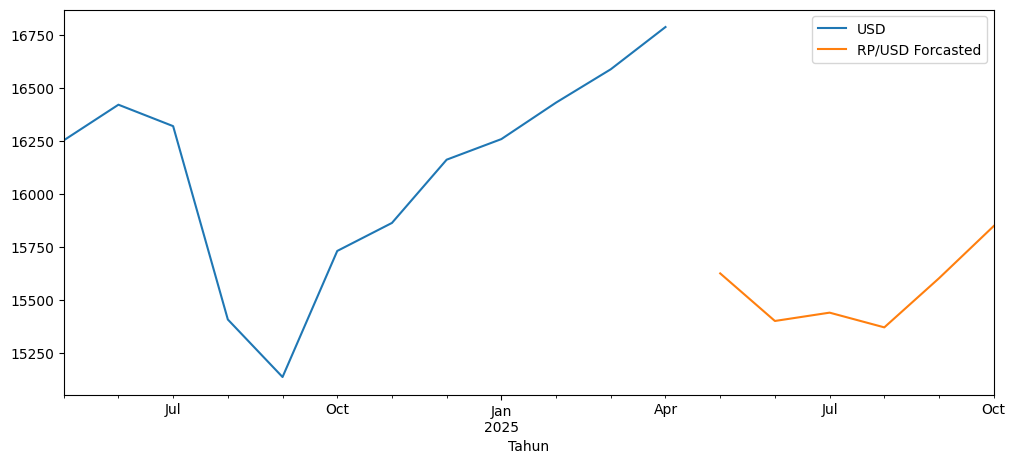

In [106]:
test_original['USD'].plot(figsize=(12,5),legend=True)
inverted['RP/USD Forcasted'].plot(legend=True)

<Axes: xlabel='Tahun'>

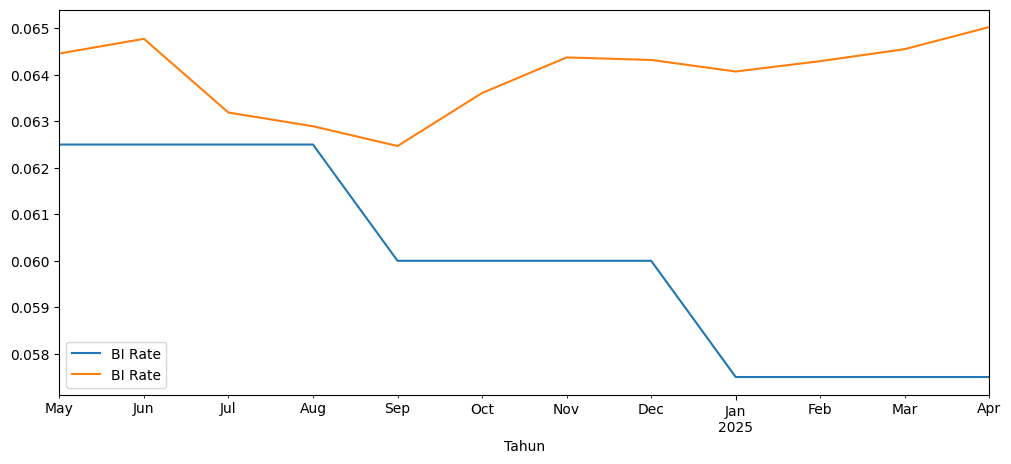

In [185]:
test_original['BI Rate'].plot(figsize=(12,5),legend=True)
inverted['BI Rate'].plot(legend=True)